In [ ]:
#  Install necessary packages
!pip install yfinance pandas numpy scikit-learn matplotlib seaborn


In [ ]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#  Load stock data (flatten columns, remove multi-index)
stock = yf.download('AAPL', start='2015-01-01', end='2024-12-31', group_by='column', auto_adjust=True)

# Reset index and keep only Date and Close
stock = stock[['Close']].reset_index()
stock.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AAPL
0,2015-01-02,24.288584
1,2015-01-05,23.604334
2,2015-01-06,23.606554
3,2015-01-07,23.937578
4,2015-01-08,24.857298


In [ ]:
#  Feature engineering: convert dates to number of days
stock['Days'] = (stock['Date'] - stock['Date'].min()).dt.days

# Define features (X) and labels (y)
X = stock[['Days']]
y = stock['Close']


In [ ]:
#  Split data: 80% train, 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
#  Train linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
#  Make predictions
y_pred = model.predict(X_test)

#  Evaluate
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 819.2488204454959
R² Score: -0.027166486320362893


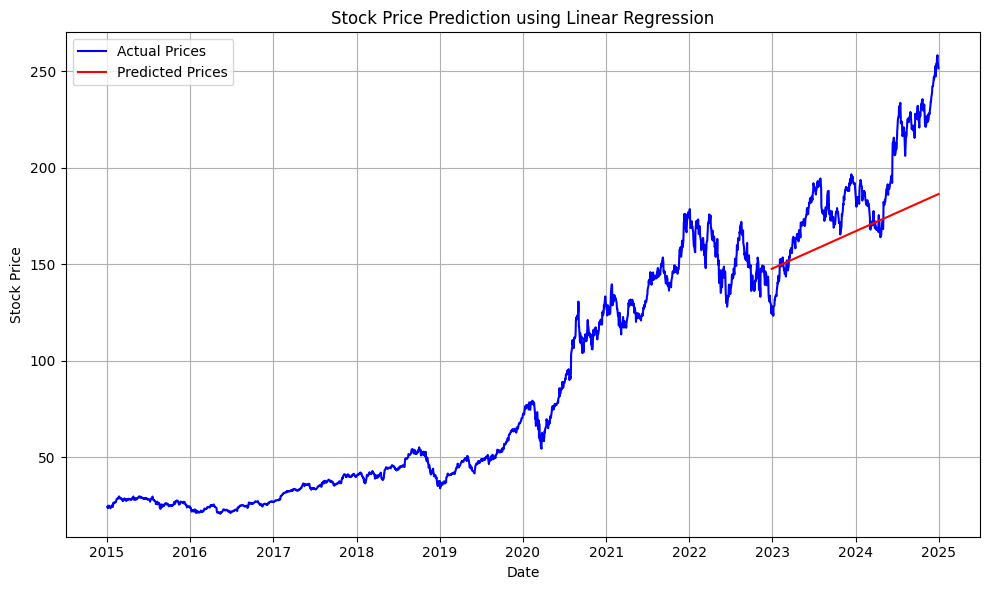

In [ ]:
#  Plot actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(stock['Date'], y, label='Actual Prices', color='blue')
plt.plot(stock['Date'].iloc[len(X_train):], y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
